# Dominant Color Extraction for Image Segmentation
- Image Segmentation
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

In [2]:
# importing the image
im = cv2.imread('./im.jpg') 
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [3]:
# display the shape of the image
print(im.shape)

(1200, 1920, 3)


In [4]:
r, c = im.shape[:2]
out_r = 100
# Resizing the image 
im = cv2.resize(im, (int(out_r*float(c)/r), out_r)) #Keeping the Aspect Ratio of the Image same while resizing
print(im.shape)

(100, 160, 3)


In [5]:
pixels = im.reshape((-1, 3))
print(pixels.shape)

(16000, 3)


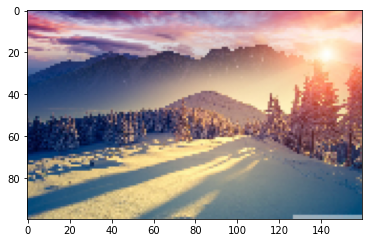

In [6]:
# Display the image
plt.imshow(im)
plt.show()

In [7]:
# Using K-Means Clustering to cluster the similar pixels together 
# K values i.e. hyparameter is 8 
km = KMeans(n_clusters=8)
km.fit(pixels)

KMeans()

In [8]:
# Values of Clusters Centroid in RGB form 
# Total number of clusters are 8 
centr_colors = np.array(km.cluster_centers_,dtype='uint8')
print(centr_colors.dtype)
print(centr_colors)

print(centr_colors.shape)

uint8
[[141  86  90]
 [ 63  84 117]
 [195 166 183]
 [171 140 133]
 [246 218 180]
 [ 27  45  89]
 [224 178 137]
 [112 117 133]]
(8, 3)


In [9]:
np.unique(km.labels_,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1342, 2258, 1224, 2525, 2421, 1825, 2018, 2387], dtype=int64))

In [10]:
# Calculating the frequency of the pixel lies in the clusters
freq = np.array(np.unique(km.labels_, return_counts=True)[1], dtype='float32')

print('Frequency of pixel in different Clusters:',freq)

print('Total number of clusters:',freq.sum())

freq = freq/pixels.shape[0]
print("Ratio of Frequency of pixel w.r.t pixels:",freq)

Frequency of pixel in different Clusters: [1342. 2258. 1224. 2525. 2421. 1825. 2018. 2387.]
Total number of clusters: 16000.0
Ratio of Frequency of pixel w.r.t pixels: [0.083875  0.141125  0.0765    0.1578125 0.1513125 0.1140625 0.126125
 0.1491875]


# Plotting all the Colors in the form of Different Charts

([<matplotlib.patches.Wedge at 0x159ad4197f0>,
 [Text(-0.8355950242864897, 1.7840069942092887, ''),
  Text(-1.794011286649318, 0.8138940369451412, ''),
  Text(-1.9049053251600858, -0.5022307260380906, ''),
  Text(-1.0744884073132093, -1.6511737227044048, ''),
  Text(0.7567046504151701, -1.8188727476214646, ''),
  Text(1.8553480373274605, -0.6622564913876952, ''),
  Text(1.8053722102567724, 0.7883724896472334, ''),
  Text(0.5711616285330465, 1.8853844154684951, '')],
 [Text(-0.4750591001019636, 1.0142577835098494, '8.4%'),
  Text(-1.019945503069663, 0.4627214829332782, '14.1%'),
  Text(-1.0829918599894905, -0.28553218942267083, '7.6%'),
  Text(-0.6108766579648702, -0.9387383601162098, '15.8%'),
  Text(0.43020772003299007, -1.0340799377340306, '15.1%'),
  Text(1.054817158277541, -0.3765113047483343, '11.4%'),
  Text(1.0264045053236472, 0.4482117707639093, '12.6%'),
  Text(0.3247213319578741, 1.0718936778298043, '14.9%')])

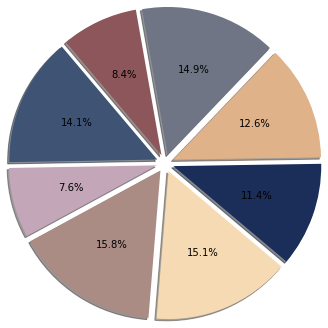

In [11]:
plt.pie(freq, colors = centr_colors/255 , 
        startangle=100, shadow = True, explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
        radius = 1.7, autopct = '%1.1f%%')

In [12]:
# Store the details of all the clusters in dom variable
dom = [[freq[ix], centr_colors[ix]] for ix in range(km.n_clusters)]

# Sort the values of dom according the frequency 
DOM = sorted(dom, key=lambda z:z[0], reverse=True)

#DOM = np.array(DOM)
print(DOM[0][1])
#print DOM.shape

[171 140 133]


In [13]:
for ix in DOM:
    print(ix)
    print("----------")

[0.1578125, array([171, 140, 133], dtype=uint8)]
----------
[0.1513125, array([246, 218, 180], dtype=uint8)]
----------
[0.1491875, array([112, 117, 133], dtype=uint8)]
----------
[0.141125, array([ 63,  84, 117], dtype=uint8)]
----------
[0.126125, array([224, 178, 137], dtype=uint8)]
----------
[0.1140625, array([27, 45, 89], dtype=uint8)]
----------
[0.083875, array([141,  86,  90], dtype=uint8)]
----------
[0.0765, array([195, 166, 183], dtype=uint8)]
----------


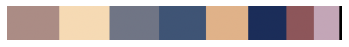

In [14]:
patch = np.ones((50, 500, 3))
start = 0
for ix in range(km.n_clusters):
    width = int(DOM[ix][0]*patch.shape[1])
    end = start+width
    patch[:,start:end,:] = DOM[ix][1]
    start = end
    plt.axis("off")
    plt.imshow(patch/255)
plt.show()

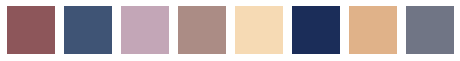

In [16]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centr_colors:
    plt.subplot(1,8,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

# Segmenting Our Original Image

In [18]:
new_img = np.zeros((100*160,3),dtype='uint8')

print(new_img.shape)

(16000, 3)


In [19]:
centr_colors

array([[141,  86,  90],
       [ 63,  84, 117],
       [195, 166, 183],
       [171, 140, 133],
       [246, 218, 180],
       [ 27,  45,  89],
       [224, 178, 137],
       [112, 117, 133]], dtype=uint8)

In [20]:
km.labels_

array([3, 7, 7, ..., 2, 2, 2])

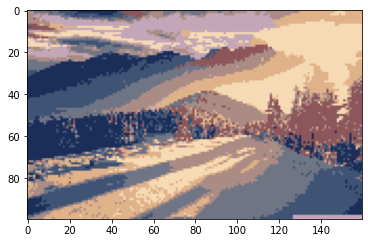

In [26]:
for ix in range(new_img.shape[0]):
    new_img[ix] = centr_colors[km.labels_[ix]]
    
new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()